In [1]:
import numpy as np
import pandas as pd

c = np.arange(0,101,10)
f = (c * 1.8) + 32

df = pd.DataFrame({'Temp in Celcius':c, 'Temp in Farenheit':f})

df

,Temp in Celcius,Temp in Farenheit
0,0,32.0
1,10,50.0
2,20,68.0
3,30,86.0
4,40,104.0
5,50,122.0
6,60,140.0
7,70,158.0
8,80,176.0
9,90,194.0


In [2]:
import matplotlib.pyplot as plt
import sqlite3

fileName = 'Volve production data.xlsx'

xl = pd.ExcelFile(fileName)
Dailydf = xl.parse('Daily Production Data')

conn = sqlite3.connect("VolveProduction.db")
cur = conn.cursor()

Dailydf.to_sql("DailyRates", conn, if_exists = 'append', index = False)

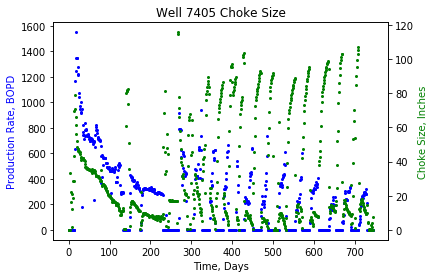

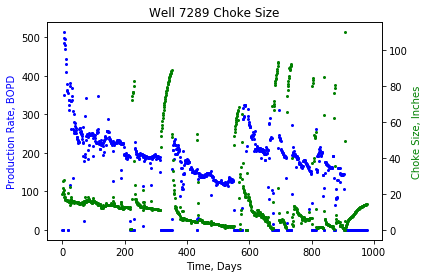

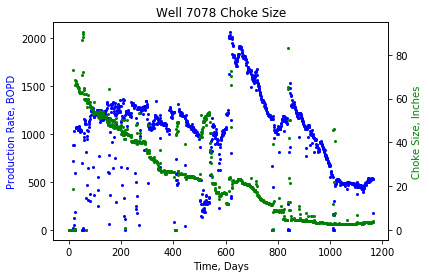

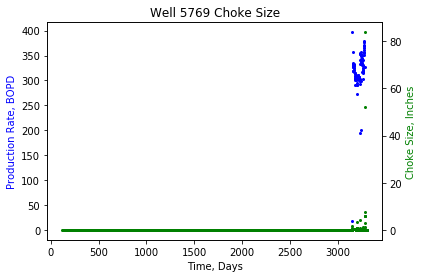

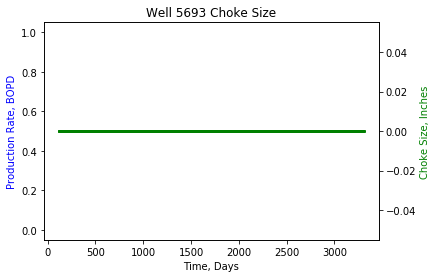

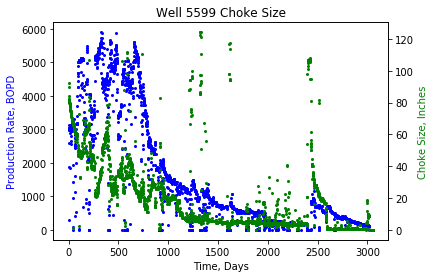

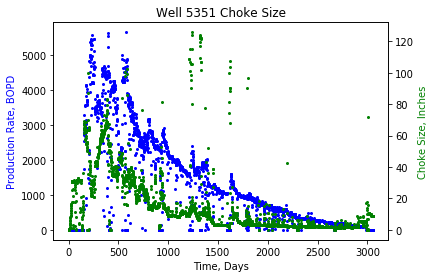

,WELL_BORE_CODE,DP_CHOKE_SIZE,BORE_OIL_VOL
0,NO 15/9-F-14 H,0.05885,0.0
1,NO 15/9-F-14 H,0.06768,0.0
2,NO 15/9-F-14 H,0.04950,0.0
3,NO 15/9-F-14 H,0.06640,0.0
4,NO 15/9-F-14 H,0.10479,0.0
5,NO 15/9-F-14 H,0.13571,0.0
6,NO 15/9-F-14 H,0.23359,0.0
7,NO 15/9-F-14 H,0.56651,0.0
8,NO 15/9-F-14 H,0.61350,0.0
9,NO 15/9-F-14 H,0.73982,0.0


In [7]:
wellBoreCodes = (7405, 7289, 7078, 5769, 5693, 5599, 5351)

for x in wellBoreCodes:
    
    testWellDF = pd.read_sql_query(f"SELECT WELL_BORE_CODE, DP_CHOKE_SIZE, BORE_OIL_VOL FROM DailyRates WHERE NPD_WELL_BORE_CODE = {x}", conn)
    
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(testWellDF['BORE_OIL_VOL'], color = 'blue', ls = 'None', marker = 'o', markersize = 2)
    ax2.plot(testWellDF['DP_CHOKE_SIZE'], color = 'green', ls = 'None', marker = 'o', markersize = 2)
    ax1.set_xlabel('Time, Days')
    ax1.set_ylabel('Production Rate, BOPD', color='b')
    ax2.set_ylabel('Choke Size, Inches', color = 'green')
    plt.title(f'Well {x} Choke Size')
    plt.show()
    
testWellDF